# Assignment 2 (Part 2)

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will explore a dataset, usually used in machine learning to perform classification. It has several demographic features of an adults and a column that shows whether they have an income of atleast 50k. Ofcourse, before performing machine learning we need to visualise clean the dataset and visualise so as to ascertain whether it will give reliable results.

**Question 1** Read the dataset `adults.csv` into the variable `adultsData`. `fnlwgt` is the index column.

In [85]:
#Write your code here
adultsData = pd.read_csv('adultscopy.csv', index_col='fnlwgt')
adultsData.head(5)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
fnlwgt,,,,,,,,,,,,,,
226802.0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
89814.0,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
336951.0,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
160323.0,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
103497.0,18.0,NaN,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


**Question 2** Convert all numerical columns, including the index, into the `int` datatype. 

In [87]:
adultsData.index = adultsData.index.astype(int)
numerical_columns = adultsData.select_dtypes(include=['float64', 'int64']).columns
adultsData[numerical_columns] = adultsData[numerical_columns].astype(int)

In [95]:
adultsData.dtypes

age                 int32
workclass          object
education          object
educational-num     int32
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int32
capital-loss        int32
hours-per-week      int32
native-country     object
income             object
dtype: object

**Question 3** Map the income column to `0` for `<= 50k` and `1` otherwise.  

In [91]:
adultsData['income'].dtype

dtype('O')

In [101]:
adultsData['income']=adultsData['income'].map(lambda x:0 if x=='<=50K' else 1)

In [103]:
adultsData

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


**Question 4** Change the name of the column `education-num` to `years of education` and `relationship` to `relationship status`. Replace dashes in the index names with spaces (without hardcoding).

In [131]:
adultsData.rename(columns={'educational-num':'years of education','relationship':'relationship status'},inplace=True)

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


**Question 5** Convert all the string columns into the `string` datatype. 

In [141]:
#adultsData.index = adultsData.index.astype(int)
str = adultsData.select_dtypes(include=['O']).columns
adultsData[str] = adultsData[str].astype('string')

In [149]:
adultsData.dtypes

age                             int32
workclass              string[python]
education              string[python]
years of education              int32
marital status         string[python]
occupation             string[python]
relationship status    string[python]
race                   string[python]
gender                 string[python]
capital gain                    int32
capital loss                    int32
hours per week                  int32
native country         string[python]
income                          int64
dtype: object

**Question 6** Replace Dash(-) with space(" ") in the entire dataset

In [151]:
adultsData.rename(columns=lambda x:x.replace('-',' '),inplace=True)
adultsData

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income
fnlwgt,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
103497,18,<NA>,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


**Question 10** Visualize the number of missing values for only the columns with missing values. 

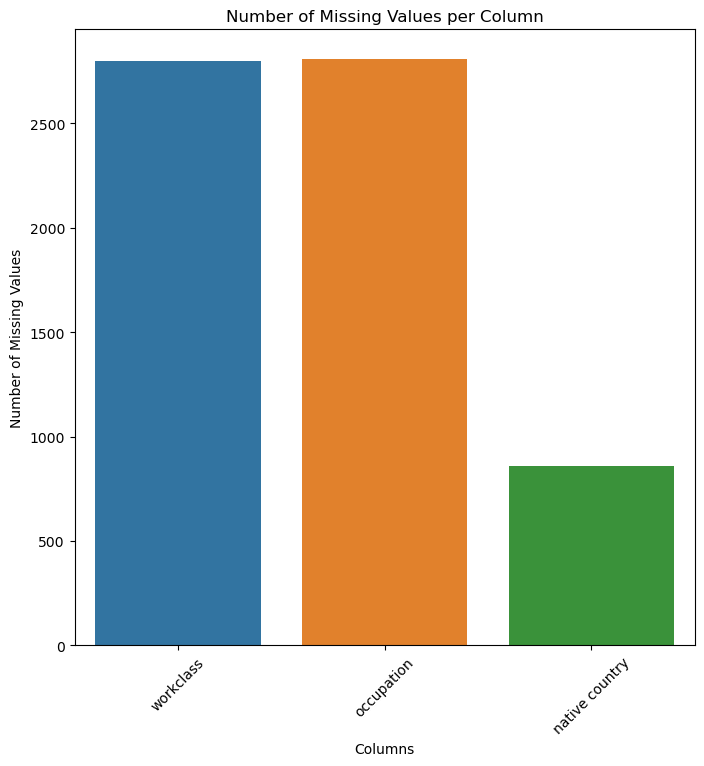

In [171]:
null_values=adultsData.isnull().sum()
nv=null_values[null_values>0]
nv
plt.figure(figsize=(8,8))
sns.barplot(x=nv.index,y=nv.values)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

**Question 11** In this question we will deal with null values. Replace the null values in each column with the non-null categorical mode of the column with the years of education. What that means is for each unique value of `years of education` find the mode of column's non-null rows, and replace null with the respective mode. 

In [201]:
import pandas as pd

# Group the DataFrame by 'years of education' and transform each column with mode values
mode_values = adultsData.groupby('years of education').transform(lambda x: x.mode().iloc[0])

# Replace null values in each column with the respective mode values based on 'years of education'
adultsData.fillna(mode_values, inplace=True)

# Check if there are any remaining null values
print("Remaining null values after replacing with mode:")
adultsData.isnull().sum()

Remaining null values after replacing with mode:


age                    0
workclass              0
education              0
years of education     0
marital status         0
occupation             0
relationship status    0
race                   0
gender                 0
capital gain           0
capital loss           0
hours per week         0
native country         0
income                 0
dtype: int64

**Question 12** Combine `capital gain` and `capital loss` columns into `capital profit`. Insert `capital profit` into `adultsData` right before `income`.

In [208]:
adultsData['capital profit']=adultsData['capital gain']-adultsData['capital loss']
adultsData

,age,workclass,education,years of education,marital status,occupation,relationship status,race,gender,capital gain,capital loss,hours per week,native country,income,capital profit
fnlwgt,,,,,,,,,,,,,,,
226802,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
89814,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
336951,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
160323,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,7688
103497,18,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257302,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0
154374,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0
151910,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0


**Question 23** Make a function `column_describe` that receives `adultsData` and the column name and returns the column description as returned by `adultsData.describe()`.

In [212]:
def column_describe(adultsData, column_name):
    return adultsData[column_name].describe()

**Question 24** Make another function `describe` that receives the dataset and uses the above function to describe the dataframe exactly as adultsData.describe() would do it. Use loops if needed.

In [214]:
def describe(adultsData):
    description = pd.DataFrame()
    for column_name in adultsData.columns:
        description[column_name] = column_describe(adultsData, column_name)
    return description

 Age Distribution: Create a histogram or density plot to visualize the distribution of ages in the dataset.

C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


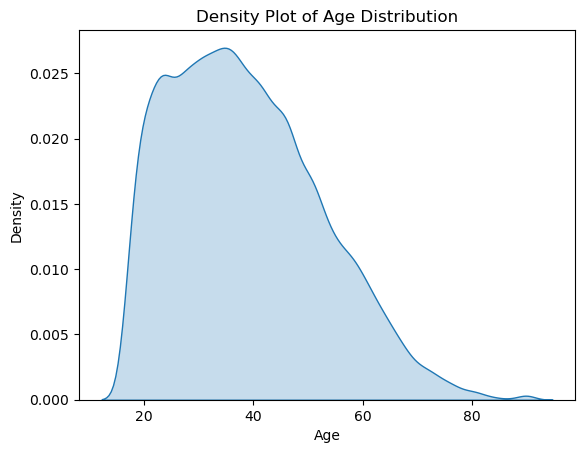

In [216]:
sns.kdeplot(data=adultsData['age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age Distribution')
plt.show()

Education Level Distribution: Generate a bar chart or pie chart to display the distribution of education levels among the individuals in the dataset.

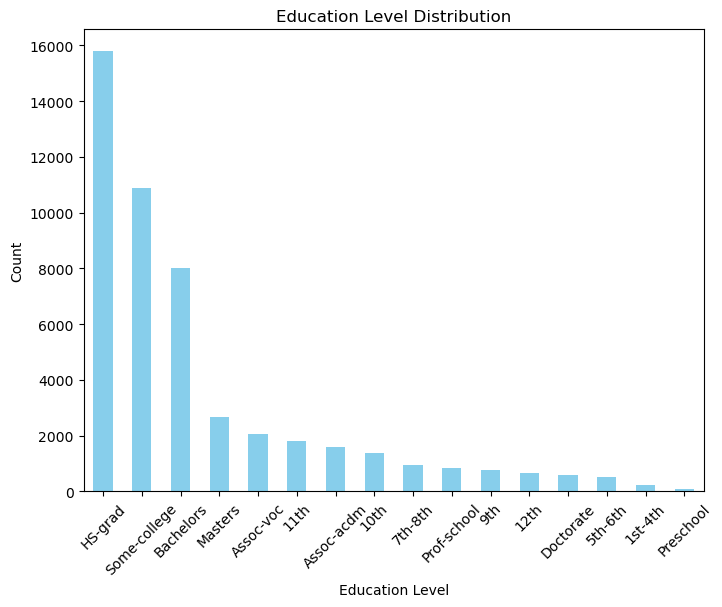

In [218]:
plt.figure(figsize=(8, 6))
education_counts = adultsData['education'].value_counts()
education_counts.plot(kind='bar', color='skyblue')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Create a grouped bar chart to show the gender and race representation within the dataset. This can help you understand the diversity of the population.

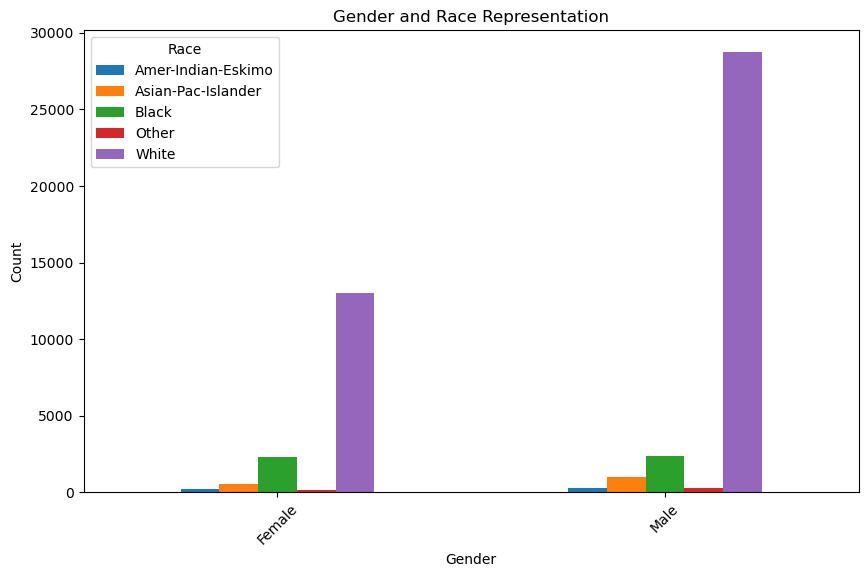

In [220]:
grouped_data = adultsData.groupby(['gender', 'race']).size().unstack()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Gender and Race Representation')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()